<a href="https://colab.research.google.com/github/JN-Nataraj/ML-Logistic_Regression-Loan_Prediction/blob/main/Notebook/Loan_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submision = pd.read_csv('sample_submission.csv')

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


<Axes: ylabel='count'>

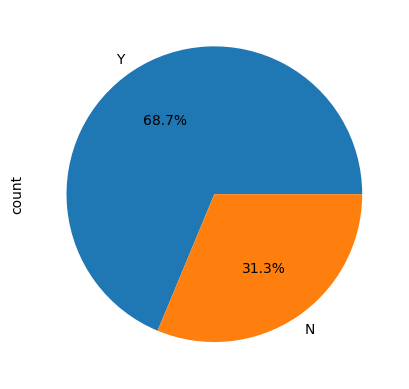

In [ ]:
train.Loan_Status.value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

In [ ]:
submision['Loan_Status'] = 'Y'
submision.to_csv('submission_Y.csv', index = False)

In [ ]:
#Benchmark with all the sample predicted as Y
from IPython.display import Image
Image('/content/Subm_y.jpg')

FileNotFoundError: No such file or directory: '/content/Subm_y.jpg'

FileNotFoundError: No such file or directory: '/content/Subm_y.jpg'

<IPython.core.display.Image object>

In [ ]:
submision['Loan_Status'] = 'N'
submision.to_csv('submission_N.csv', index = False)

In [ ]:
#Benchmark with all the sample predicted as Y
from IPython.display import Image
Image('/content/Subm_n.jpg')

FileNotFoundError: No such file or directory: '/content/Subm_n.jpg'

FileNotFoundError: No such file or directory: '/content/Subm_n.jpg'

<IPython.core.display.Image object>

### ***EDA Exploratory Data Analysis***

<Axes: xlabel='Loan_Status', ylabel='count'>

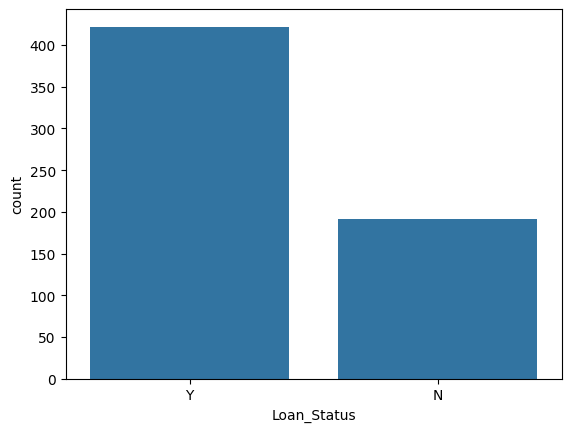

In [ ]:
sns.countplot(x= 'Loan_Status', data = train)

In [ ]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


[Text(0, 0, '422'), Text(0, 0, '192')]

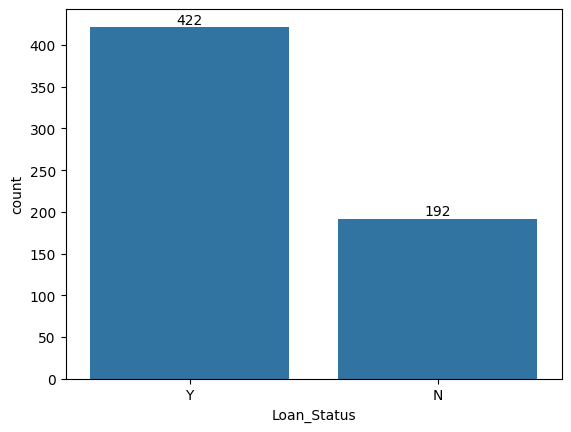

In [ ]:
# to show the numbers in the plot
ax = sns.countplot(x= 'Loan_Status', data = train)
ax.bar_label(ax.containers[0])

<Axes: xlabel='ApplicantIncome', ylabel='LoanAmount'>

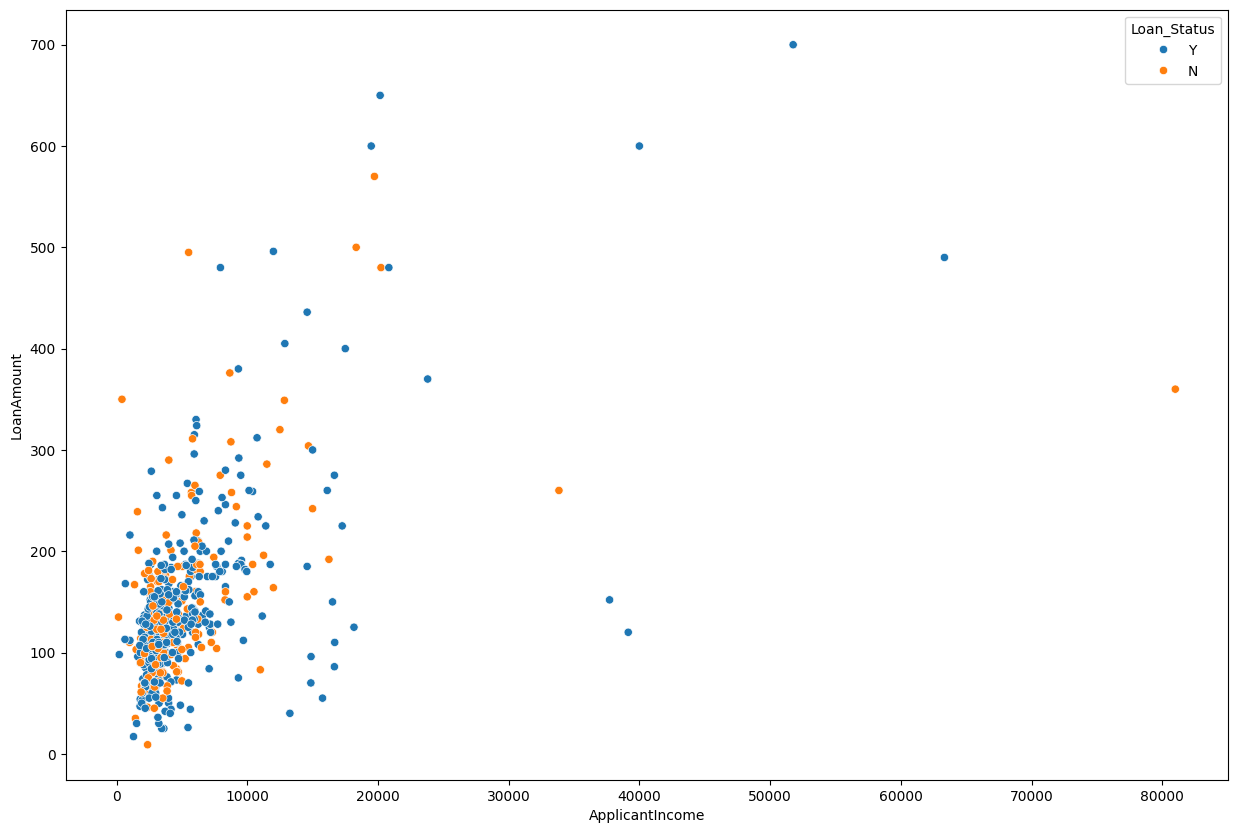

In [ ]:
#plotting it against income
plt.figure(figsize = (15,10))
sns.scatterplot(x='ApplicantIncome', y='LoanAmount', data=train, hue = 'Loan_Status')

<Axes: xlabel='Credit_History', ylabel='LoanAmount'>

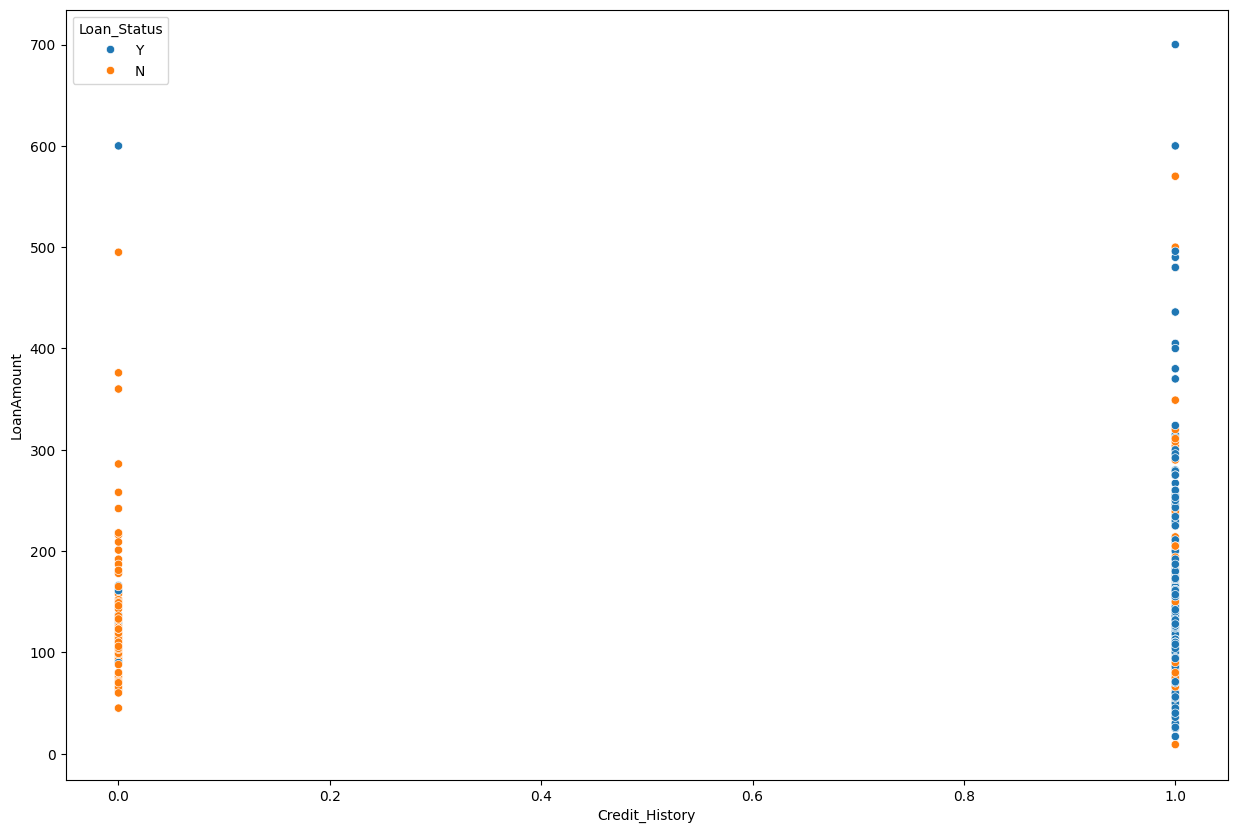

In [ ]:
#plotting it against credit history
plt.figure(figsize = (15,10))
sns.scatterplot(x='Credit_History', y='LoanAmount', data=train, hue = 'Loan_Status')

<Axes: xlabel='CoapplicantIncome', ylabel='LoanAmount'>

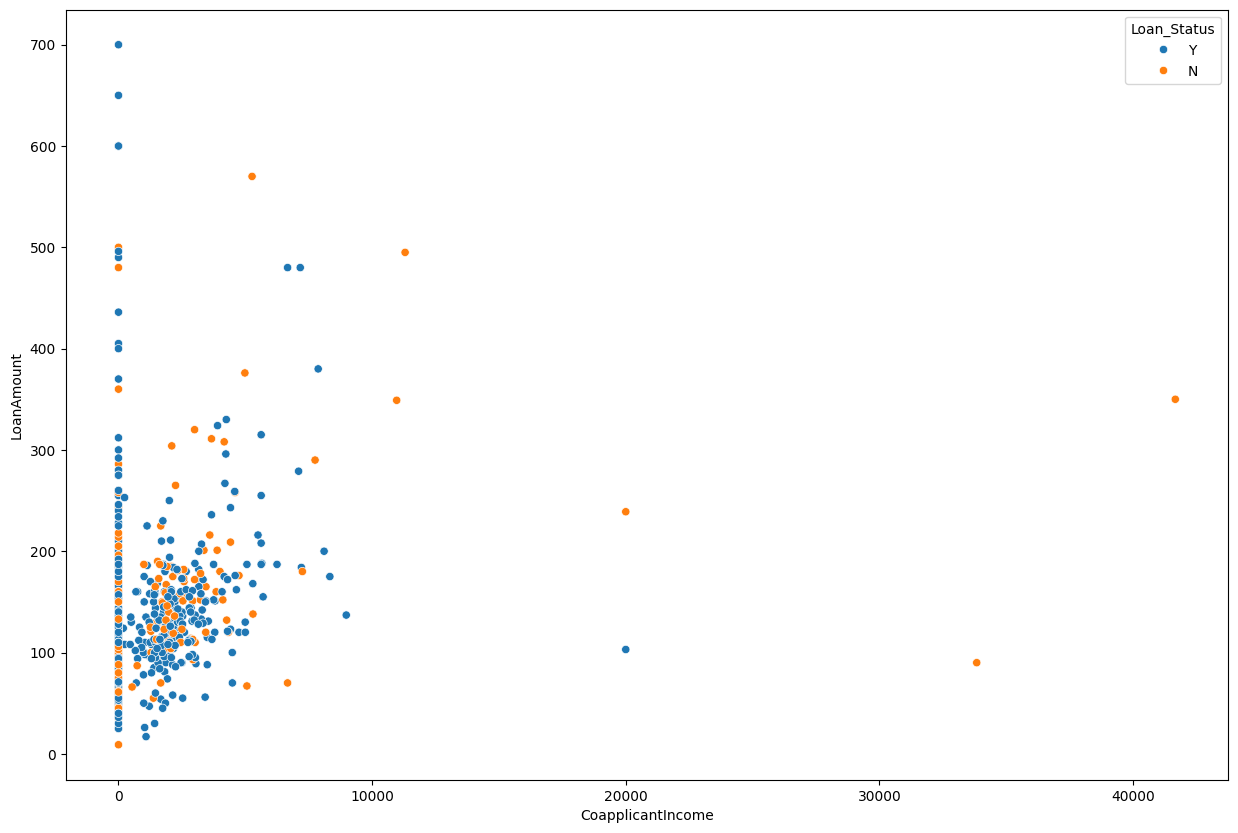

In [ ]:
#plotting it against coapplicant income
plt.figure(figsize = (15,10))
sns.scatterplot(x='CoapplicantIncome', y='LoanAmount', data=train, hue = 'Loan_Status')

In [ ]:
train.groupby(['Gender','Married','Education','Property_Area'])['Loan_Status'].value_counts(normalize=True).unstack()

Loan_Status                                       N         Y
Gender Married Education    Property_Area                    
Female No      Graduate     Rural          0.333333  0.666667
                            Semiurban      0.392857  0.607143
                            Urban          0.347826  0.652174
               Not Graduate Rural          0.500000  0.500000
                            Semiurban      0.166667  0.833333
                            Urban          0.500000  0.500000
       Yes     Graduate     Rural          1.000000       NaN
                            Semiurban           NaN  1.000000
                            Urban          0.666667  0.333333
               Not Graduate Rural               NaN  1.000000
                            Semiurban      0.250000  0.750000
Male   No      Graduate     Rural          0.419355  0.580645
                            Semiurban      0.303030  0.696970
                            Urban          0.400000  0.600000
               Not Graduate Rural          0.384615  0.615385
                            Semiurban      0.181818  0.818182
                            Urban          0.714286  0.285714
       Yes     Graduate     Rural          0.316456  0.683544
                            Semiurban      0.196078  0.803922
                            Urban          0.244681  0.755319
               Not Graduate Rural          0.500000  0.500000
                            Semiurban      0.280000  0.720000
                            Urban          0.413793  0.586207

<Axes: xlabel='Loan_Status', ylabel='Gender-Married-Education-Property_Area'>

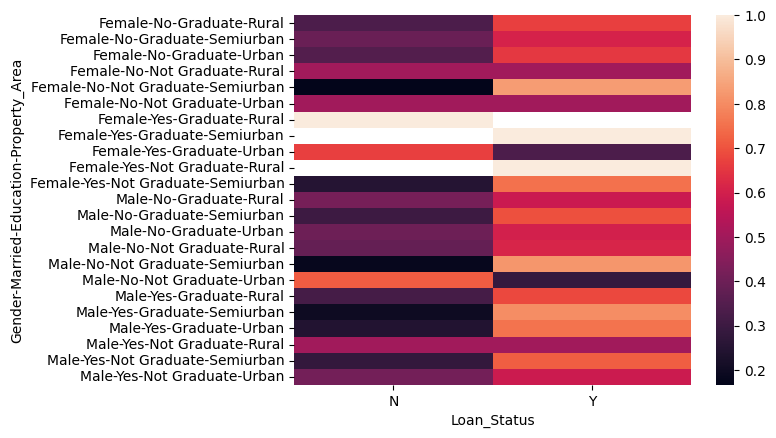

In [ ]:
sns.heatmap(train.groupby(['Gender','Married','Education','Property_Area'])['Loan_Status'].value_counts(normalize=True).unstack())

<Figure size 4000x1000 with 0 Axes>

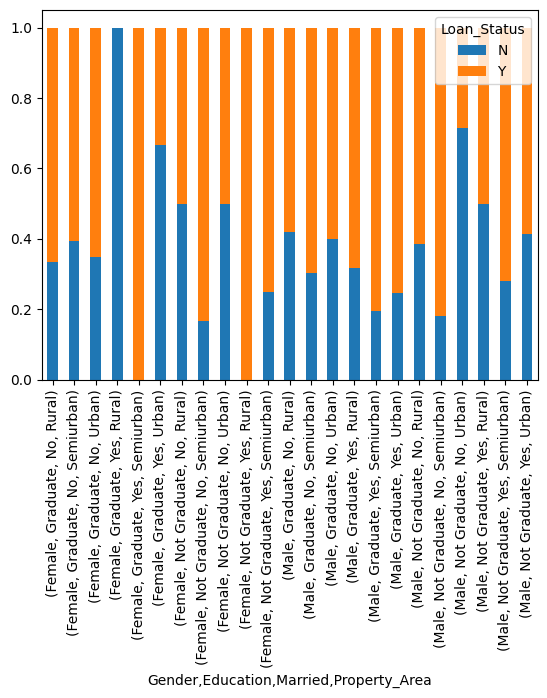

In [ ]:
plt.figure(figsize = (40, 10))
grouped = train.groupby(['Gender','Education','Married', 'Property_Area'])['Loan_Status'].value_counts(normalize = True).unstack()
grouped.plot(kind = 'bar', stacked = True)
plt.show()

In [ ]:
train.groupby(['Credit_History','Education','Married', 'Property_Area'])['Loan_Status'].value_counts(normalize = True).unstack()

Loan_Status                                               N         Y
Credit_History Education    Married Property_Area                    
0.0            Graduate     No      Rural          0.857143  0.142857
                                    Semiurban      0.833333  0.166667
                                    Urban          1.000000       NaN
                            Yes     Rural          0.923077  0.076923
                                    Semiurban      0.916667  0.083333
                                    Urban          0.916667  0.083333
               Not Graduate No      Rural          1.000000       NaN
                                    Urban          1.000000       NaN
                            Yes     Rural          1.000000       NaN
                                    Semiurban      0.833333  0.166667
                                    Urban          1.000000       NaN
1.0            Graduate     No      Rural          0.305556  0.694444
                                    Semiurban      0.204082  0.795918
                                    Urban          0.304348  0.695652
                            Yes     Rural          0.230769  0.769231
                                    Semiurban      0.088235  0.911765
                                    Urban          0.177215  0.822785
               Not Graduate No      Rural          0.375000  0.625000
                                    Semiurban      0.133333  0.866667
                                    Urban          0.400000  0.600000
                            Yes     Rural          0.350000  0.650000
                                    Semiurban      0.105263  0.894737
                                    Urban          0.250000  0.750000

In [ ]:
train.groupby(['Credit_History'])['Loan_Status'].value_counts(normalize = True).unstack()

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


In [ ]:
train.groupby(['Credit_History'])['Loan_Status'].value_counts(normalize = True).unstack()

Loan_Status,N,Y
Credit_History,,
0.0,0.921348,0.078652
1.0,0.204211,0.795789


In [ ]:
train['Loan_Status'].replace({'Y':1, 'N':0}, inplace = True)

<Axes: >

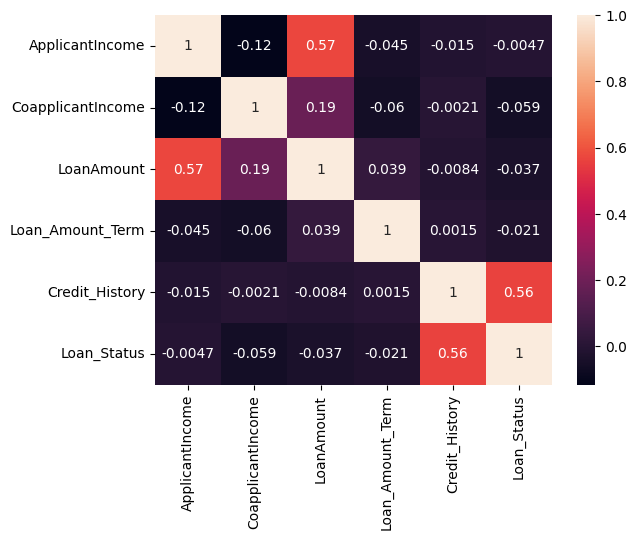

In [ ]:
sns.heatmap(train.select_dtypes(np.number).corr(), annot = True)

### ***PREPROCESSION WITH PIPELINE***

In [ ]:
train.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
train['FE_Total_Income'] = train['ApplicantIncome'] + train['CoapplicantIncome']

train['LoanAmountBin'] = pd.qcut(train['LoanAmount'], q=4, labels=['Bin1', 'Bin2', 'Bin3', 'Bin4'])

# The original line caused a MemoryError as it tried to count all unique combinations within each group.
# train.groupby(['Loan_Amount_Term']).value_counts()

# To see the distribution of Loan_Amount_Term itself, use value_counts directly on the column:
train['Loan_Amount_Term'].value_counts()

# If you meant to count Loan_Status within each Loan_Amount_Term group, you can use:
# train.groupby(['Loan_Amount_Term'])['Loan_Status'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
84.0,4
240.0,4
120.0,3
60.0,2
36.0,2


In [ ]:
y = train['Loan_Status']

In [ ]:
X = train.drop(['Loan_ID','Loan_Status'], axis=1)

In [ ]:
X.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'FE_Total_Income', 'LoanAmountBin'],
      dtype='object')

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X,y,test_size = 30, random_state = 42)

In [ ]:
categoical_features = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area','Loan_Amount_Term']
numerical_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# 1. Pipeline for Numerical features
a. median imputer
b. standard scaler

# 2. Pipeline for categorical features
a. most_frequent imputer
b. one hot encoder

# Column Transformer with 2 pipeline
preprocess = Pipeline for numerical features + Pipeline for categorical features

# model_pipeline
Column Transormer
a. Preprocess
b. Logistic Regression

In [ ]:
numerical_transformer = Pipeline(
 steps = [
      ('imputer',SimpleImputer(strategy = 'median')),
     ('scaler',StandardScaler())
 ]
)

categorical_transformer = Pipeline(
   steps = [
        ('imputer',SimpleImputer(strategy = 'most_frequent')),
     ('onehotencoder',OneHotEncoder(handle_unknown = 'ignore'))
   ]
)

In [ ]:
preprocess = ColumnTransformer(
    transformers = [
        ('numerical_transform', numerical_transformer, numerical_features),
        ('categorical_transform', categorical_transformer, categoical_features)
    ]
)

In [ ]:
model_preprocess = Pipeline (
    steps = [
        ('preprocess', preprocess),
        ('classifier', LogisticRegression())
    ]
)
model_preprocess

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('categorical_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area',
                                                   'Loan_Amount_Term'])])),
                ('classifier', LogisticRegression())])

In [ ]:
model_preprocess.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('numerical_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount']),
                                                 ('categorical_transform',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self_Employed',
                                                   'Credit_History',
                                                   'Property_Area',
                                                   'Loan_Amount_Term'])])),
                ('classifier', LogisticRegression())])

In [ ]:
train_pred = model_preprocess.predict(train_X)

In [ ]:
test_pred = model_preprocess.predict(test_X)

In [ ]:
print(accuracy_score(train_y, train_pred))
print(accuracy_score(test_y, test_pred))

0.8116438356164384
0.9


In [ ]:
print(classification_report(train_y, train_pred))
print(classification_report(test_y, test_pred))

              precision    recall  f1-score   support

           0       0.91      0.46      0.61       188
           1       0.79      0.98      0.88       396

    accuracy                           0.81       584
   macro avg       0.85      0.72      0.74       584
weighted avg       0.83      0.81      0.79       584

              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.90      1.00      0.95        26

    accuracy                           0.90        30
   macro avg       0.95      0.62      0.67        30
weighted avg       0.91      0.90      0.87        30



In [ ]:
print(confusion_matrix(train_y, train_pred))
print('-------------------------------')
print(confusion_matrix(test_y, test_pred))

[[ 87 101]
 [  9 387]]
-------------------------------
[[ 1  3]
 [ 0 26]]


In [ ]:
test_data = test.drop(columns = ['Loan_ID'])

In [ ]:
test_data = model_preprocess.predict(test_data)

In [ ]:
test_data

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
test_data_predicted = np.where(test_data==1, 'Y', 'N')

In [ ]:
submision['Loan_Status'] = test_data_predicted
submision.to_csv('Submission_Predicted.csv', index = False)